In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from sklearn.datasets import fetch_openml
from sklearn.compose import make_column_selector
from ml import CatBoostRegressorCV #uses RegressorCV as base class
from ml import AutoRegressor
import numpy as np
import pandas as pd

# Load the Ames Housing dataset
housing = fetch_openml(name="house_prices", as_frame=True)
X = housing['data'].fillna(np.nan)
y = housing['target']

num_cols = make_column_selector(dtype_include=np.number)(X)
cat_cols = make_column_selector(dtype_include=object)(X)
data = pd.concat([X, y], axis=1)

<AxesSubplot:>

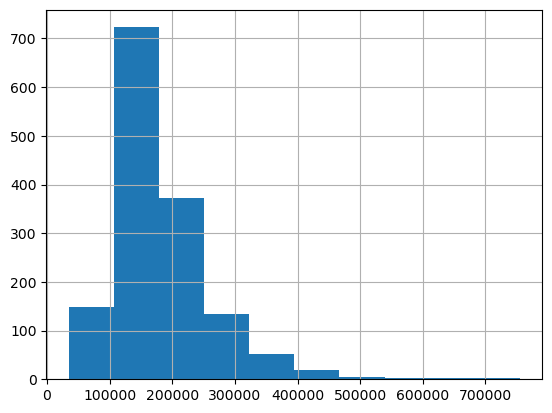

In [3]:
y.hist()

In [4]:
y_bin = pd.cut(y, 10)

In [5]:
y_bin.value_counts().sort_index()

(34179.9, 106910.0]     148
(106910.0, 178920.0]    723
(178920.0, 250930.0]    373
(250930.0, 322940.0]    135
(322940.0, 394950.0]     51
(394950.0, 466960.0]     19
(466960.0, 538970.0]      4
(538970.0, 610980.0]      3
(610980.0, 682990.0]      2
(682990.0, 755000.0]      2
Name: SalePrice, dtype: int64

<AxesSubplot:>

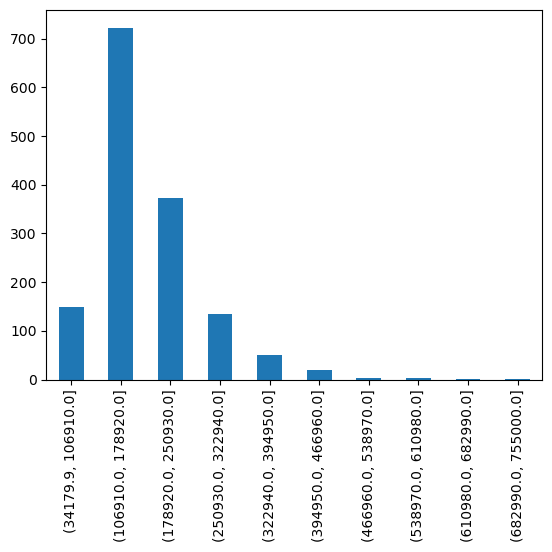

In [6]:
y_bin.value_counts().sort_index().plot.bar()

In [7]:
y_bin.value_counts(normalize=True).sort_index()

(34179.9, 106910.0]     0.101370
(106910.0, 178920.0]    0.495205
(178920.0, 250930.0]    0.255479
(250930.0, 322940.0]    0.092466
(322940.0, 394950.0]    0.034932
(394950.0, 466960.0]    0.013014
(466960.0, 538970.0]    0.002740
(538970.0, 610980.0]    0.002055
(610980.0, 682990.0]    0.001370
(682990.0, 755000.0]    0.001370
Name: SalePrice, dtype: float64

<AxesSubplot:>

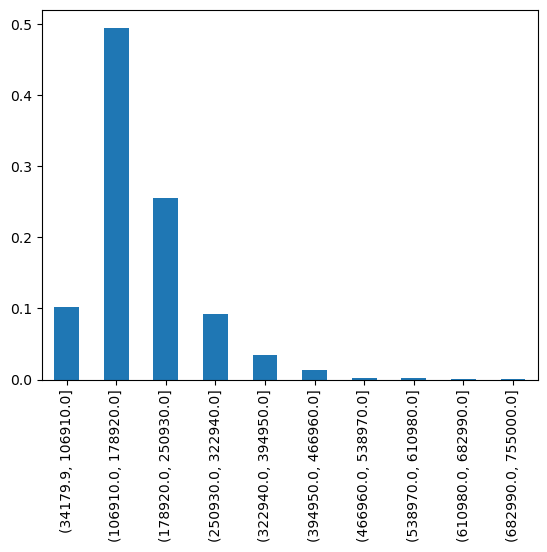

In [8]:
y_bin.value_counts(normalize=True).sort_index().plot.bar()

# Test AutoRegressor

In [13]:
ar = AutoRegressor(
    num_cols=num_cols,
    cat_cols=cat_cols,
    target_col='SalePrice',
    use_catboost_native_cat_features=True,
    data=data,
)
ar.fit_report()

Imputer strategy: SimpleImputer(strategy='median')
Using estimator <catboost.core.CatBoostRegressor object at 0x149d899d0>
R2 Score: 0.9160567995409361
RMSE: 24249.702308651435
MAPE: 0.08528036637019434


<AxesSubplot:>

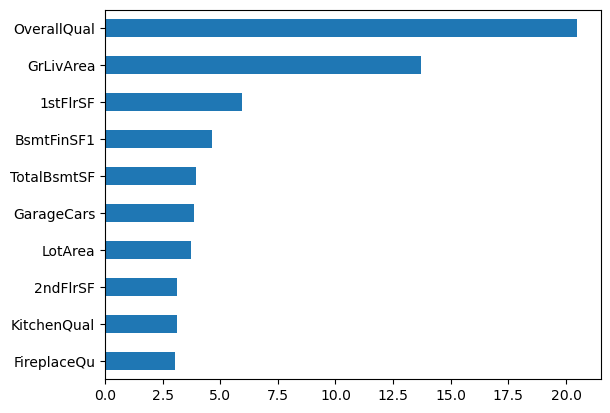

In [19]:
ar.get_feature_importances().head(10).sort_values().plot.barh()

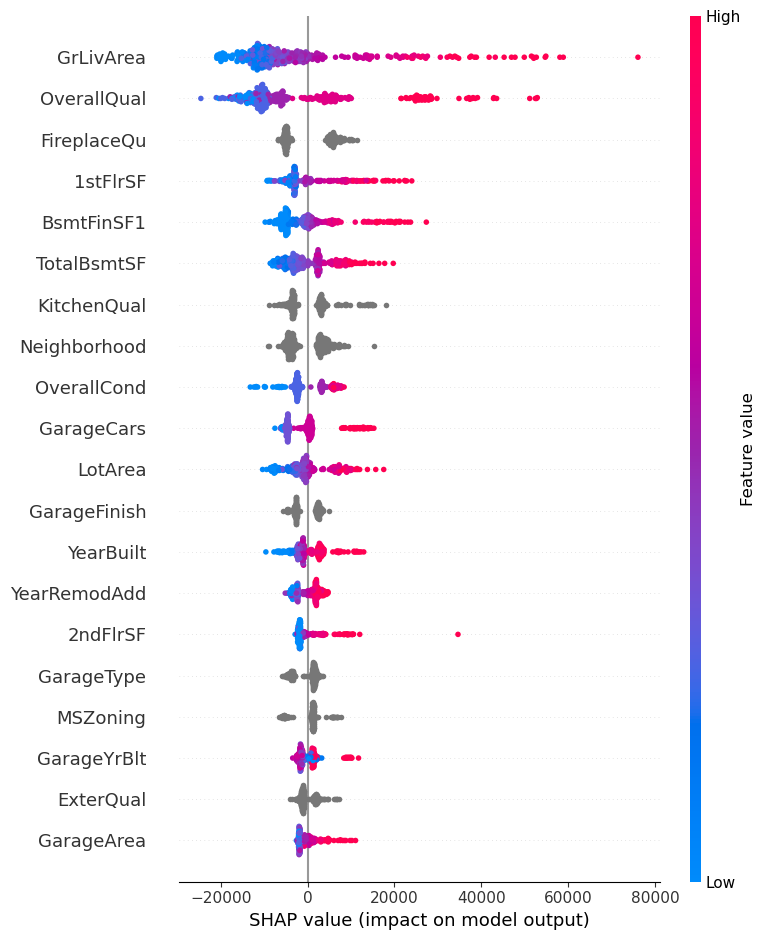

In [20]:
ar.get_shap()

# Test CatBoostRegressorCV with Stratification

In [10]:
cbcv = CatBoostRegressorCV(
    cat_features=list(range(len(cat_cols))),
    verbose=True,
    n_bins_stratify=10,
)

ar = AutoRegressor(
    num_cols=num_cols,
    cat_cols=cat_cols,
    target_col='SalePrice',
    use_catboost_native_cat_features=True,
    data=data,
    estimator=cbcv,
)

ar.fit_report()

Imputer strategy: SimpleImputer(strategy='median')
Using estimator CatBoostRegressorCV(cat_features=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                  14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24,
                                  25, 26, 27, 28, 29, ...],
                    n_bins_stratify=10, verbose=True)
Stratifying
0    103
1    528
2    292
3    105
4     41
5     17
6      4
7      3
8      1
9      1
Name: target, dtype: int64
0    0.094064
1    0.482192
2    0.266667
3    0.095890
4    0.037443
5    0.015525
6    0.003653
7    0.002740
8    0.000913
9    0.000913
Name: target, dtype: float64
--------------------------------------------------------------------------------
Training set stratification
0     83
1    422
2    233
3     84
4     33
5     13
6      4
7      3
8      1
Name: target, dtype: int64
0    0.094749
1    0.481735
2    0.265982
3    0.095890
4    0.037671
5    0.014840
6    0.004566
7    0.003425
8    0.001142
Name: target, dtype:

The least populated class in y has only 1 members, which is less than n_splits=5.


Fold 0 Results:
R2 Score: 0.8614560974121745
RMSE: 30133.31706134539
MAPE: 0.09357491893304348
--------------------------------------------------------------------------------
Training set stratification
0     83
1    422
2    233
3     84
4     33
5     14
6      3
7      2
8      1
9      1
Name: target, dtype: int64
0    0.094749
1    0.481735
2    0.265982
3    0.095890
4    0.037671
5    0.015982
6    0.003425
7    0.002283
8    0.001142
9    0.001142
Name: target, dtype: float64
Testing set stratification
0     20
1    106
2     59
3     21
4      8
5      3
6      1
7      1
Name: target, dtype: int64
0    0.091324
1    0.484018
2    0.269406
3    0.095890
4    0.036530
5    0.013699
6    0.004566
7    0.004566
Name: target, dtype: float64
--------------------------------------------------------------------------------
Fold 1 Results:
R2 Score: 0.6481780609776034
RMSE: 44609.62453723534
MAPE: 0.11101540509516813
-------------------------------------------------------------------

# Test CatBoostRegressorCV No Stratification

In [11]:
cbcv = CatBoostRegressorCV(
    cat_features=list(range(len(cat_cols))),
    verbose=True,
    #n_bins_stratify=10,
)

ar = AutoRegressor(
    num_cols=num_cols,
    cat_cols=cat_cols,
    target_col='SalePrice',
    use_catboost_native_cat_features=True,
    data=data,
    estimator=cbcv,
)

ar.fit_report()

Imputer strategy: SimpleImputer(strategy='median')
Using estimator CatBoostRegressorCV(cat_features=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                  14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24,
                                  25, 26, 27, 28, 29, ...],
                    verbose=True)
Training set no stratification
(34309.9, 93910.0]       58
(93910.0, 152920.0]     315
(152920.0, 211930.0]    272
(211930.0, 270940.0]    134
(270940.0, 329950.0]     57
(329950.0, 388960.0]     19
(388960.0, 447970.0]     14
(447970.0, 506980.0]      3
(506980.0, 565990.0]      2
(565990.0, 625000.0]      2
Name: target, dtype: int64
(34309.9, 93910.0]      0.066210
(93910.0, 152920.0]     0.359589
(152920.0, 211930.0]    0.310502
(211930.0, 270940.0]    0.152968
(270940.0, 329950.0]    0.065068
(329950.0, 388960.0]    0.021689
(388960.0, 447970.0]    0.015982
(447970.0, 506980.0]    0.003425
(506980.0, 565990.0]    0.002283
(565990.0, 625000.0]    0.002283
Name: target,